In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.linear_model import LinearRegression
from fbprophet import Prophet

In [45]:
# Read 5 Year Price/Time Daily Increment Data for Bitcoin into a DataFrame
bitcoin = pd.read_csv('BTC5Y.csv')
bitcoin.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-26,9669.43,10475.00,9501.73,10366.70,10366.70,7287690240
1,2018-02-27,10393.90,10878.50,10246.10,10725.60,10725.60,6966179840
2,2018-02-28,10687.20,11089.80,10393.10,10397.90,10397.90,6936189952
3,2018-03-01,10385.00,11052.30,10352.70,10951.00,10951.00,7317279744
4,2018-03-02,10977.40,11189.00,10850.10,11086.40,11086.40,7620590080


In [46]:
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1827 non-null   object 
 1   Open       1827 non-null   float64
 2   High       1827 non-null   float64
 3   Low        1827 non-null   float64
 4   Close      1827 non-null   float64
 5   Adj Close  1827 non-null   float64
 6   Volume     1827 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 100.0+ KB


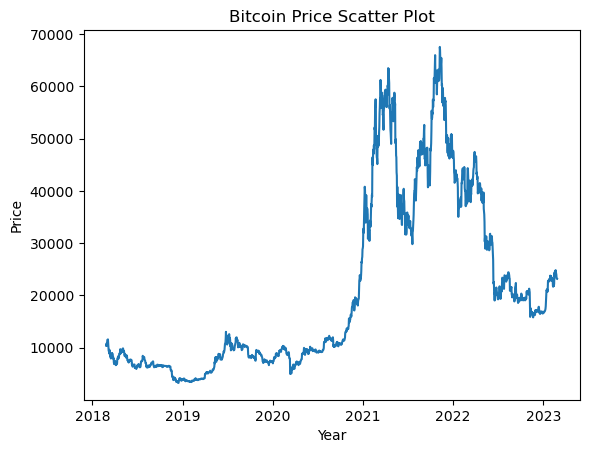

In [47]:
# Convert the "Date" column to a datetime object
bitcoin['Date'] = pd.to_datetime(bitcoin['Date'])

# Set the float format to show up to 2 decimal places
pd.options.display.float_format = '{:.2f}'.format

# Plot a scatter plot of Bitcoin price data with time in years on the x-axis and price on the y-axis
plt.plot(bitcoin['Date'], bitcoin['Close'])

# Add a title and labels to the plot
plt.title('Bitcoin Price Scatter Plot')
plt.xlabel('Year')
plt.ylabel('Price')

# Show the plot
plt.show()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean RMSE:  8.298049616874783e-08
Initial log joint probability = -31.508


/Users/affoon/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2833.53     0.0643659       1314.66           1           1      113   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2886.81     0.0165014       436.672           1           1      228   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2920.06    0.00295471       138.488           1           1      349   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     369       2940.03    0.00189889       520.436   5.443e-06       0.001      470  LS failed, Hessian reset 
     399       2949.06    0.00723203       221.444      0.2425      0.2081      509   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     422       2950.75   0.000256128       116.236   2.382e-06       0.001      5

/Users/affoon/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/affoon/opt/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


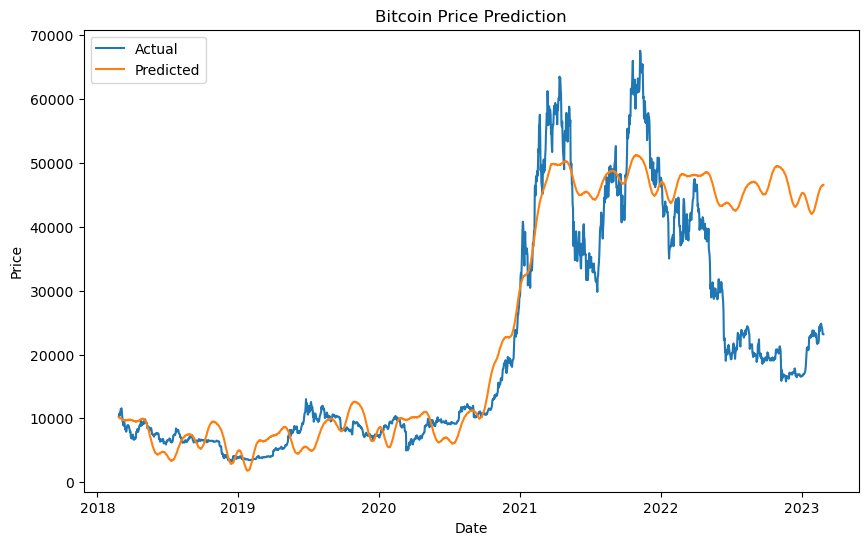

In [48]:
#Set the date column as the index
bitcoin.set_index('Date', inplace=True)

# Split the data into features (X) and target (y)
X = bitcoin.drop('Close', axis=1)
y = bitcoin['Close']

# Define the number of splits for cross-validation
n_splits = 10

# Define the time series cross-validator
tscv = TimeSeriesSplit(n_splits=n_splits)

# Define the linear regression model
model = LinearRegression()

# Use cross-validation to evaluate the model performance
scores = cross_val_score(model, X, y, cv=tscv, scoring='neg_mean_squared_error')

# Print the mean RMSE across all cross-validation folds
print('Mean RMSE: ', (-scores.mean()) ** 0.5)

# Split the data into training and testing sets
train_size = int(len(bitcoin) * 0.8)
train_data = bitcoin[:train_size]
test_data = bitcoin[train_size:]

# Train the model on the training set
model = Prophet()
model.fit(train_data.reset_index().rename(columns={'Date': 'ds', 'Close': 'y'}))

# Make predictions on the testing set
future = model.make_future_dataframe(periods=len(test_data), freq='D')
forecast = model.predict(future)

# Plot the actual data and the predictions
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(bitcoin.index, bitcoin['Close'], label='Actual')
ax.plot(forecast['ds'], forecast['yhat'], label='Predicted')
ax.legend(loc='upper left')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()
